## 4. Непрерывные случайные величины. Функция распределения и плотность распределения вероятностей. Равномерное и нормальное распределение. Центральная предельная теорема

In [33]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

def uniform_M(a, b):
    return (a+b)/2

def uniform_D(a, b):
    return ((b-a)**2)/12

### 1. Случайная непрерывная величина A имеет равномерное распределение на промежутке (200, 800]. Найдите ее среднее значение и дисперсию.

In [26]:
M = uniform_M(200, 800)
D = uniform_D(200, 800)
print(f'Среднее = {M}\nДисперсия = {D}')

Среднее = 500.0
Дисперсия = 30000.0


### 2.О случайной непрерывной равномерно распределенной величине B известно, что ее дисперсия равна 0.2. Можно ли найти правую границу величины B и ее среднее значение зная, что левая граница равна 0.5? Если да, найдите ее.

Подставим значения дисперсии и правой границы в формулу:
$$D(X) = \frac{(b - a)^2}{12}$$

Получим:
$$0.2 = \frac{(b - 0.5)^2}{12},$$

$$(b - 0.5)^2 = 12 \cdot 0.2 = 2.4$$

$$(b - 0.5) = \pm\sqrt{2.4}$$

Берем только положителный корень, так как считаем что правая граница всегда больше левой

In [27]:
b = np.sqrt(2.4) + 0.5
M = uniform_M(0.5, b)
print(f'Правая граница = {b}\nСреднее = {M}')

Правая граница = 2.049193338482967
Среднее = 1.2745966692414834


### 3. Непрерывная случайная величина X распределена нормально и задана плотностью распределения
### f(x) = (1 / (4 * sqrt(2*pi))) * (exp(-(x+2)**2) / 32).
### Найдите:
### а). M(X)
### б). D(X)
### в). std(X) (среднее квадратичное отклонение)

Следуя формуле плотности нормального распределения:
$$f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e ^ {- \frac{(x - a)^2}{2 \sigma^2}},$$

получим что среднеквадратичное отклонение $\sigma = 4$, 
дисперсия $D(X) = \sigma^2 = 16$, 
Среднее (мат. ожидание) $M(X) = -2$.

### 4.
Рост взрослого населения города X имеет нормальное распределение.

Причем, средний рост равен 174 см, а среднее квадратичное отклонение равно 8 см.

Какова вероятность того, что случайным образом выбранный взрослый человек имеет рост:

а). больше 182 см

б). больше 190 см

в). от 166 см до 190 см

г). от 166 см до 182 см

д). от 158 см до 190 см

е). не выше 150 см или не ниже 190 см

ё). не выше 150 см или не ниже 198 см

ж). ниже 166 см.

In [34]:
from scipy.stats import norm
mean, std = 174, 8

s = norm(loc=mean, scale=std)
f = s.pdf ## функция плотности распределения
F = s.cdf ## функция распределения

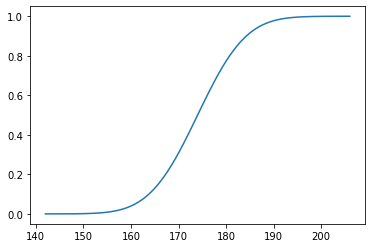

In [35]:
## проверю, что это действительно функция нормального распределения
a = np.linspace(mean-4*std, mean+4*std, num=1000)
p = np.array([F(x) for x in a])
plt.plot(a, p)
plt.show()

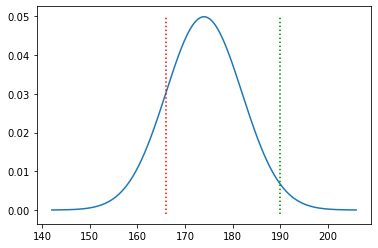

In [36]:
density = np.array([f(x) for x in a])
plt.plot(a, density)
y1 = np.array([-0.001, 0.05])
x1 = 166
x2 = 190
plt.plot([x1, x1], y1, color='red', linestyle='dotted')
plt.plot([x2, x2], y1, color='green', linestyle='dotted')
plt.show()

Я решил проверить формулы расчета, о которых говорили на уроке. Интуитивно они были понятны, сомнения вызвали лишь формула расчета вероятности для попадания величины в интервал. Поэтому пришлось вспоминать математику :)

Вероятность попадания величины в интервал будет равна площади под кривой плотности, ограниченной вертикальными линиями, проходящими через значения границ интервала. Эта площадь вычисляется через интеграл:
$$P(x_1<x<x_2) = \int\limits_{x_1}^{x_2}f(x)dx$$
Так как $$f(x) = F'(x),$$ то $$P(x_1<x<x_2) = F(x_2) - F(x_1)$$

При этом если не задана одна из границ интервала, то она либо $-\infty$ либо $+\infty$. $F(-\infty) = 0, F(\infty) = 1$.

В итоге:

$$P(-\infty < x < a) = \int\limits_{-\infty}^af(x)dx = F(a) - F(-\infty) = F(a),$$
$$P(a < x < \infty) = \int\limits^{\infty}_af(x)dx = F(\infty) - F(a) = 1 - F(a),$$



In [38]:
## а). больше 182 см
print(f'Больше 182 см: {1 - F(182)}')

## б). больше 190 см
print(f'Больше 190 см: {1 - F(190)}')

## в). от 166 см до 190 см
print(f'от 166 см до 190 см: {F(190) - F(166)}')

## г). от 166 см до 182 см
print(f'от 166 см до 182 см: {F(182) - F(166)}')

## д). от 158 см до 190 см
print(f'от 158 см до 190 см: {F(190) - F(158)}')

## е). не выше 150 см или не ниже 190 см
print(f'не выше 150 см или не ниже 190 см: {F(150) + 1 - F(190)}')

## ё). не выше 150 см или не ниже 198 см
print(f'не выше 150 см или не ниже 198 см: {F(150) + 1 - F(198)}')

## ж). ниже 166 см.
print(f'ниже 166 см: {F(166)}')

Больше 182 см: 0.15865525393145707
Больше 190 см: 0.02275013194817921
от 166 см до 190 см: 0.8185946141203637
от 166 см до 182 см: 0.6826894921370859
от 158 см до 190 см: 0.9544997361036416
не выше 150 см или не ниже 190 см: 0.0241000299798092
не выше 150 см или не ниже 198 см: 0.002699796063260096
ниже 166 см: 0.15865525393145707


### 5. На сколько сигм (средних квадратичных отклонений) отклоняется рост человека, равный 190 см, от математического ожидания роста в популяции, в которой M(X) = 178 см и D(X) = 25 кв.см?

Среднеквадратичное отклонение равно $\sigma = \sqrt{D(x)} = 5 см$,

$190 - 178 = 12$,

$12 \div 5 = 2.4$

Ответ 2.4 сигмы)